In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_24531/2133981016.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## DATA

In [2]:
stock_AAPL_df = pd.read_csv('./data/AAPL.csv')

In [3]:
stock_AAPL_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0


In [4]:
stock_AAPL_df[['year', 'month', 'day']] = stock_AAPL_df['date'].str.split('-', expand=True)
stock_AAPL_df['day'] = stock_AAPL_df['day'].str.split(' ', expand=True)[0]

In [5]:
scaler = MinMaxScaler()
stock_AAPL_df[['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']] = scaler.fit_transform(stock_AAPL_df[['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']])
stock_AAPL_df


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,0.233588,0.222348,0.234725,0.223961,0.045198,0.040304,0.033266,0.039291,0.031434,0.197297,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,0.232085,0.228818,0.242001,0.233467,0.075974,0.039379,0.037298,0.043761,0.037475,0.295466,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,0.234890,0.223608,0.239358,0.229470,0.032166,0.041107,0.034050,0.042137,0.034935,0.155728,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,0.230708,0.224250,0.240012,0.234759,0.029693,0.038530,0.034451,0.042539,0.038296,0.147839,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,0.230507,0.222126,0.234398,0.230737,0.051047,0.038407,0.033127,0.039090,0.035740,0.215954,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,0.158272,0.150784,0.167095,0.162462,0.100890,0.821598,0.820203,0.824724,0.828945,0.048963,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,0.155291,0.146067,0.163961,0.157319,0.117206,0.813969,0.807989,0.816725,0.815366,0.061975,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,0.157320,0.149376,0.164842,0.156612,0.106489,0.819162,0.816558,0.818973,0.813499,0.053428,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,0.155241,0.152439,0.165446,0.160268,0.130720,0.813841,0.824487,0.820515,0.823153,0.072751,0.0,1.0,2024,04,04


In [6]:
train_stock_df = stock_AAPL_df[stock_AAPL_df['year'] != '2024']
train_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,0.233588,0.222348,0.234725,0.223961,0.045198,0.040304,0.033266,0.039291,0.031434,0.197297,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,0.232085,0.228818,0.242001,0.233467,0.075974,0.039379,0.037298,0.043761,0.037475,0.295466,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,0.234890,0.223608,0.239358,0.229470,0.032166,0.041107,0.034050,0.042137,0.034935,0.155728,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,0.230708,0.224250,0.240012,0.234759,0.029693,0.038530,0.034451,0.042539,0.038296,0.147839,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,0.230507,0.222126,0.234398,0.230737,0.051047,0.038407,0.033127,0.039090,0.035740,0.215954,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,AAPL,2023-12-22 00:00:00+00:00,0.217307,0.210446,0.226242,0.220938,0.080274,0.971124,0.973113,0.974135,0.981746,0.032522,0.0,1.0,2023,12,22
1188,AAPL,2023-12-26 00:00:00+00:00,0.215930,0.206692,0.225889,0.217112,0.054654,0.967603,0.963405,0.973237,0.971654,0.012092,0.0,1.0,2023,12,26
1189,AAPL,2023-12-27 00:00:00+00:00,0.216180,0.205729,0.221509,0.214381,0.113738,0.968243,0.960914,0.962069,0.964455,0.059209,0.0,1.0,2023,12,27
1190,AAPL,2023-12-28 00:00:00+00:00,0.217257,0.208594,0.226745,0.218403,0.070625,0.970996,0.968323,0.975419,0.975061,0.024828,0.0,1.0,2023,12,28


In [7]:
test_stock_df =  stock_AAPL_df[stock_AAPL_df['year'] == '2024']
test_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
1192,AAPL,2024-01-02 00:00:00+00:00,0.197370,0.193234,0.203371,0.201365,0.221409,0.920159,0.928598,0.915827,0.930132,0.145072,0.0,1.0,2024,01,02
1193,AAPL,2024-01-03 00:00:00+00:00,0.193889,0.186912,0.202225,0.194223,0.146469,0.911260,0.912249,0.912906,0.911299,0.085310,0.0,1.0,2024,01,03
1194,AAPL,2024-01-04 00:00:00+00:00,0.188028,0.180015,0.195806,0.189177,0.188708,0.896278,0.894412,0.896540,0.897994,0.118994,0.0,1.0,2024,01,04
1195,AAPL,2024-01-05 00:00:00+00:00,0.186199,0.179207,0.194019,0.188787,0.158243,0.891604,0.892322,0.891983,0.896965,0.094700,0.0,1.0,2024,01,05
1196,AAPL,2024-01-08 00:00:00+00:00,0.197170,0.186221,0.197367,0.189019,0.148741,0.919647,0.910460,0.900519,0.897576,0.087122,0.0,1.0,2024,01,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,0.158272,0.150784,0.167095,0.162462,0.100890,0.821598,0.820203,0.824724,0.828945,0.048963,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,0.155291,0.146067,0.163961,0.157319,0.117206,0.813969,0.807989,0.816725,0.815366,0.061975,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,0.157320,0.149376,0.164842,0.156612,0.106489,0.819162,0.816558,0.818973,0.813499,0.053428,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,0.155241,0.152439,0.165446,0.160268,0.130720,0.813841,0.824487,0.820515,0.823153,0.072751,0.0,1.0,2024,04,04


In [8]:
train_stock_df['open'], test_stock_df['open']

(0       0.223961
 1       0.233467
 2       0.229470
 3       0.234759
 4       0.230737
           ...   
 1187    0.220938
 1188    0.217112
 1189    0.214381
 1190    0.218403
 1191    0.217818
 Name: open, Length: 1192, dtype: float64,
 1192    0.201365
 1193    0.194223
 1194    0.189177
 1195    0.188787
 1196    0.189019
           ...   
 1253    0.162462
 1254    0.157319
 1255    0.156612
 1256    0.160268
 1257    0.158562
 Name: open, Length: 66, dtype: float64)

## Visialize

In [9]:
total_df = pd.DataFrame(train_stock_df[['open', 'date', 'volume']], columns=['open', 'cate', 'volume', 'date']).replace(np.nan, 'train')
total_df = pd.concat([total_df, test_stock_df[['open', 'date', 'volume']]]).replace(np.nan, 'test')
total_df

,open,cate,volume,date
0,0.223961,train,0.045198,2019-04-08 00:00:00+00:00
1,0.233467,train,0.075974,2019-04-09 00:00:00+00:00
2,0.229470,train,0.032166,2019-04-10 00:00:00+00:00
3,0.234759,train,0.029693,2019-04-11 00:00:00+00:00
4,0.230737,train,0.051047,2019-04-12 00:00:00+00:00
...,...,...,...,...
1253,0.162462,test,0.100890,2024-04-01 00:00:00+00:00
1254,0.157319,test,0.117206,2024-04-02 00:00:00+00:00
1255,0.156612,test,0.106489,2024-04-03 00:00:00+00:00
1256,0.160268,test,0.130720,2024-04-04 00:00:00+00:00


<Axes: xlabel='date', ylabel='open'>

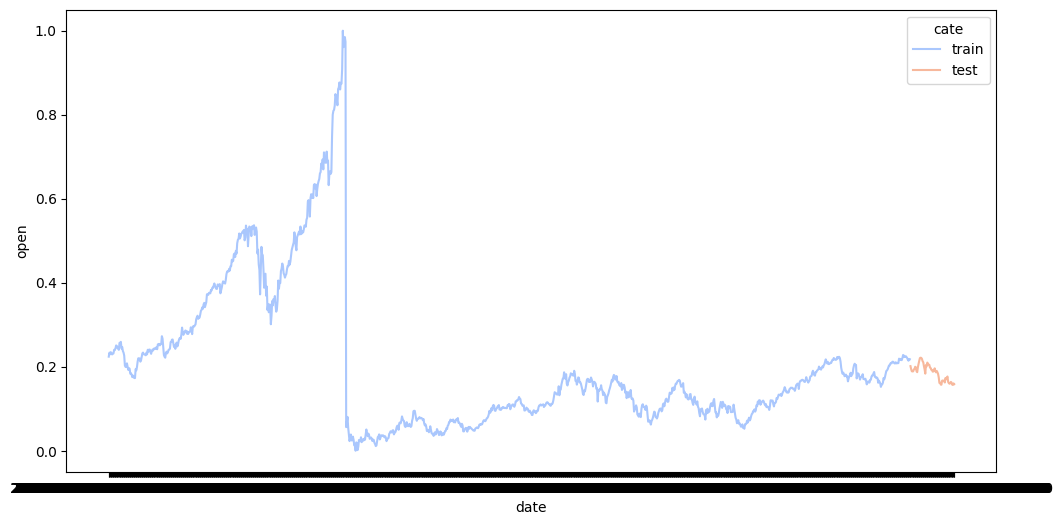

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')

<Axes: xlabel='date', ylabel='open'>

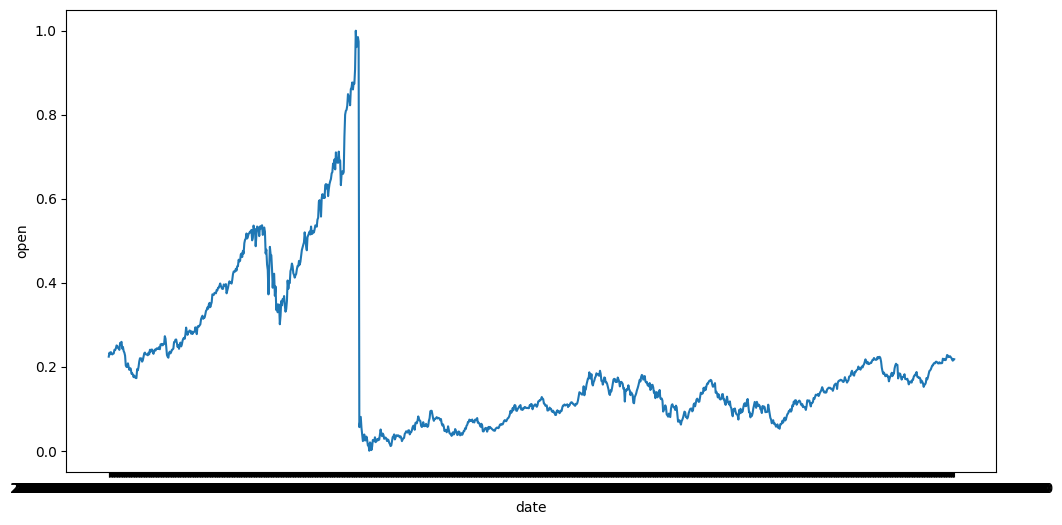

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_stock_df, x='date', y='open')

<Axes: xlabel='date', ylabel='open'>

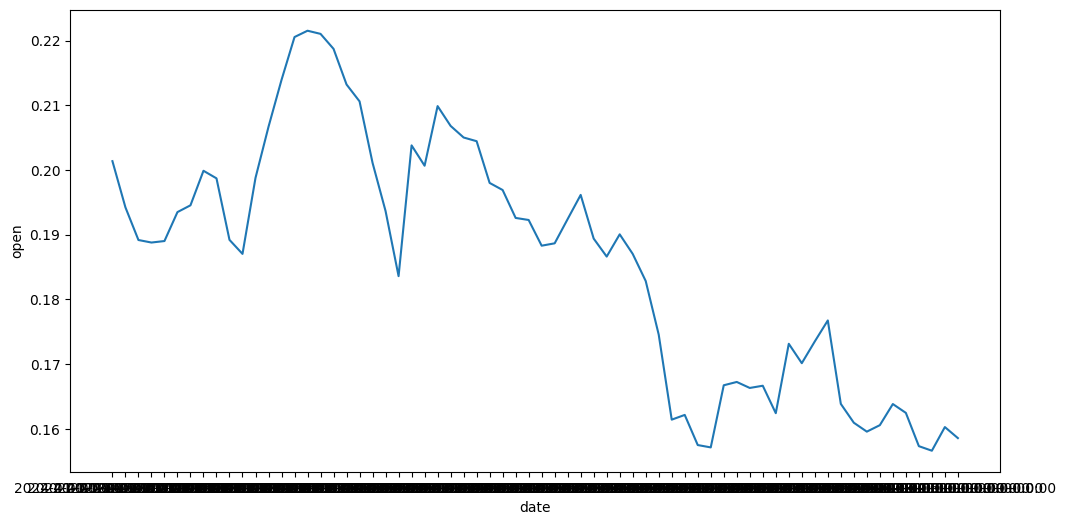

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_stock_df, x='date', y='open')

## Model

In [13]:
linear_regression_model = LinearRegression()

In [14]:
X = train_stock_df[['year', 'month', 'day', 'volume']].values.astype(int)
y = train_stock_df['open'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = linear_regression_model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.1168923132677118
Mean Squared Error: 0.023588491681344855
Root Mean Squared Error: 0.15358545400312118


## Testing

In [20]:
# from sklearn.exernals import joblib
import joblib
# Save the model
model_path = './models/lr_model.pkl'
joblib.dump(linear_regression_model, model_path)


['./models/lr_model.pkl']

In [ ]:
predicted_vals = linear_regression_model.predict(test_stock_df[['year', 'month', 'day', 'volume']].values)

<Axes: xlabel='date', ylabel='open'>

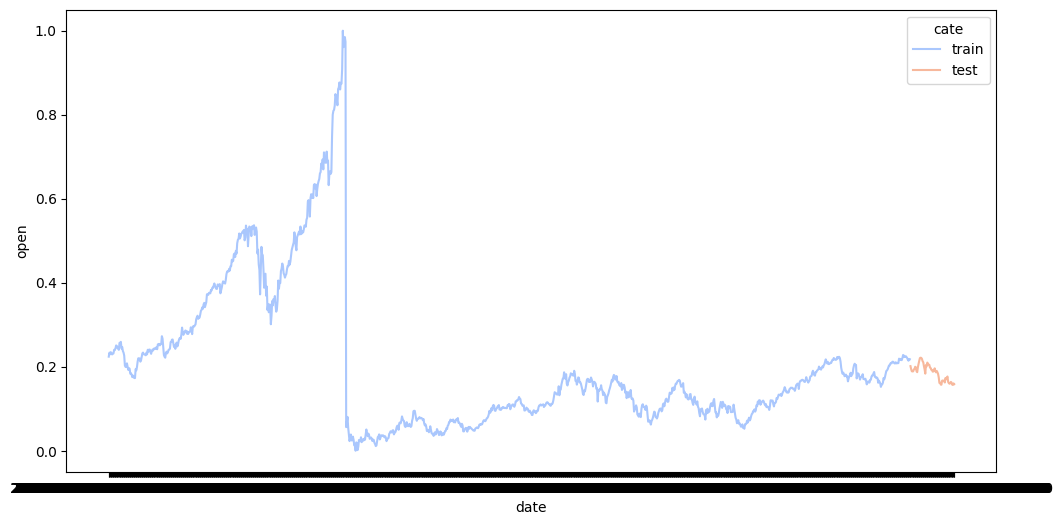

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')

In [ ]:
predicted_df = pd.DataFrame(predicted_vals, columns=['open'])
predicted_df['date'] = test_stock_df['date'].values
predicted_df['cate'] = 'predicted'


In [ ]:
prediction_linear_regression_model_graph_df = pd.DataFrame(train_stock_df[['open', 'date']], columns=['open', 'cate', 'date']).replace(np.nan, 'train')
prediction_linear_regression_model_graph_df = pd.concat([prediction_linear_regression_model_graph_df, predicted_df])
prediction_linear_regression_model_graph_df.reset_index(drop=True, inplace=True)

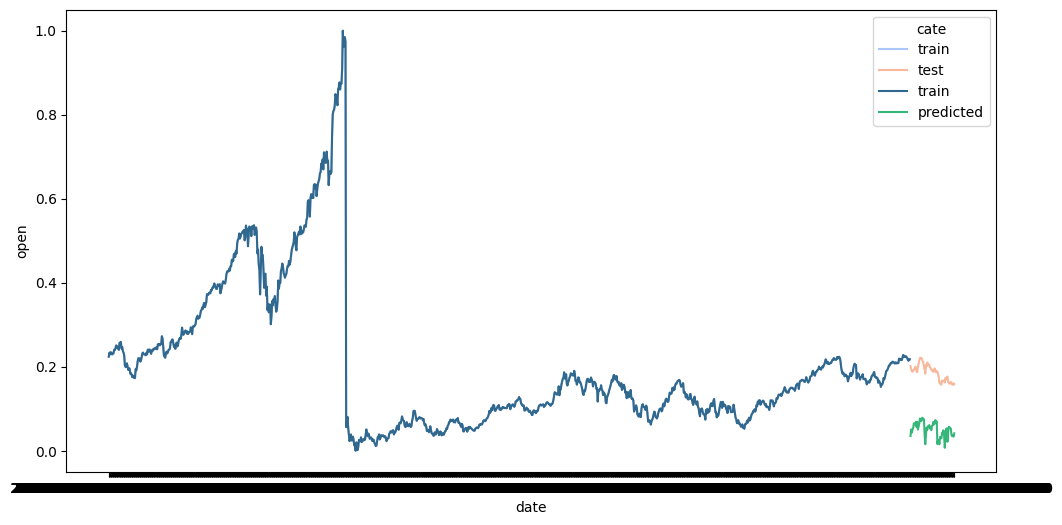

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', hue='cate', palette='coolwarm')
sns.lineplot(data=prediction_linear_regression_model_graph_df, x='date', y='open', hue='cate', palette='viridis')
plt.show()

## Final Result

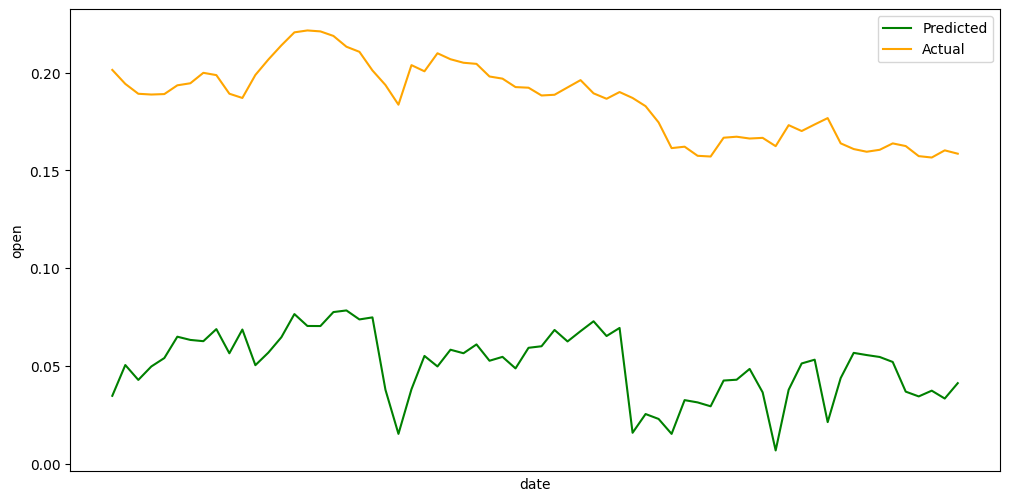

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=predicted_df, x='date', y='open', color='green', label='Predicted')
sns.lineplot(data=test_stock_df, x='date', y='open', color='orange', label='Actual')
plt.xticks([])
plt.legend()